In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../../generated_data/generated_cpu_data_test.csv')

In [25]:
df['date'] = pd.to_datetime(df['date'])
df

C:\Users\HP\AppData\Local\Temp\ipykernel_21636\1621113520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,cpu_util,date,lag_1,lag_2,predict
2,100.895190,2023-07-25 00:13:06.466,82.067813,66.834766,0
3,73.259342,2023-07-25 00:18:06.466,100.895190,82.067813,0
4,82.504274,2023-07-25 00:23:06.466,73.259342,100.895190,0
5,62.700953,2023-07-25 00:28:06.466,82.504274,73.259342,0
6,88.266038,2023-07-25 00:33:06.466,62.700953,82.504274,0
...,...,...,...,...,...
1435,17.553220,2023-07-29 23:38:06.568,50.442835,49.355296,0
1436,36.001713,2023-07-29 23:43:06.568,17.553220,50.442835,0
1437,21.256935,2023-07-29 23:48:06.568,36.001713,17.553220,0
1438,24.075016,2023-07-29 23:53:06.568,21.256935,36.001713,0


In [5]:
#add lag
num_lags = 2
for i in range(1, num_lags+1):
    df['lag_{}'.format(i)] = df['cpu_util'].shift(i)
    
df = df.dropna()

In [6]:
#load model
model = tf.keras.models.load_model('../model.h5')

In [10]:
X_test = df[['cpu_util', 'lag_1', 'lag_2']]
X_test.to_numpy()

array([[100.89519006,  82.06781293,  66.83476563],
       [ 73.25934193, 100.89519006,  82.06781293],
       [ 82.504274  ,  73.25934193, 100.89519006],
       ...,
       [ 21.25693475,  36.00171336,  17.55321965],
       [ 24.07501628,  21.25693475,  36.00171336],
       [ 14.96263119,  24.07501628,  21.25693475]])

In [12]:
predict = model.predict(X_test.to_numpy())

45/45 [==============================] - 0s 3ms/step


In [13]:
predict.max()

0.8240608

In [14]:
#add prediction to dataframe
df['predict'] = predict

C:\Users\HP\AppData\Local\Temp\ipykernel_21636\3742868938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict'] = predict


In [16]:
df['predict'] = df['predict'].apply(lambda x: 1 if x > 0.5 else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_21636\3320055466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict'] = df['predict'].apply(lambda x: 1 if x > 0.5 else 0)


In [22]:
import matplotlib.pyplot as plt

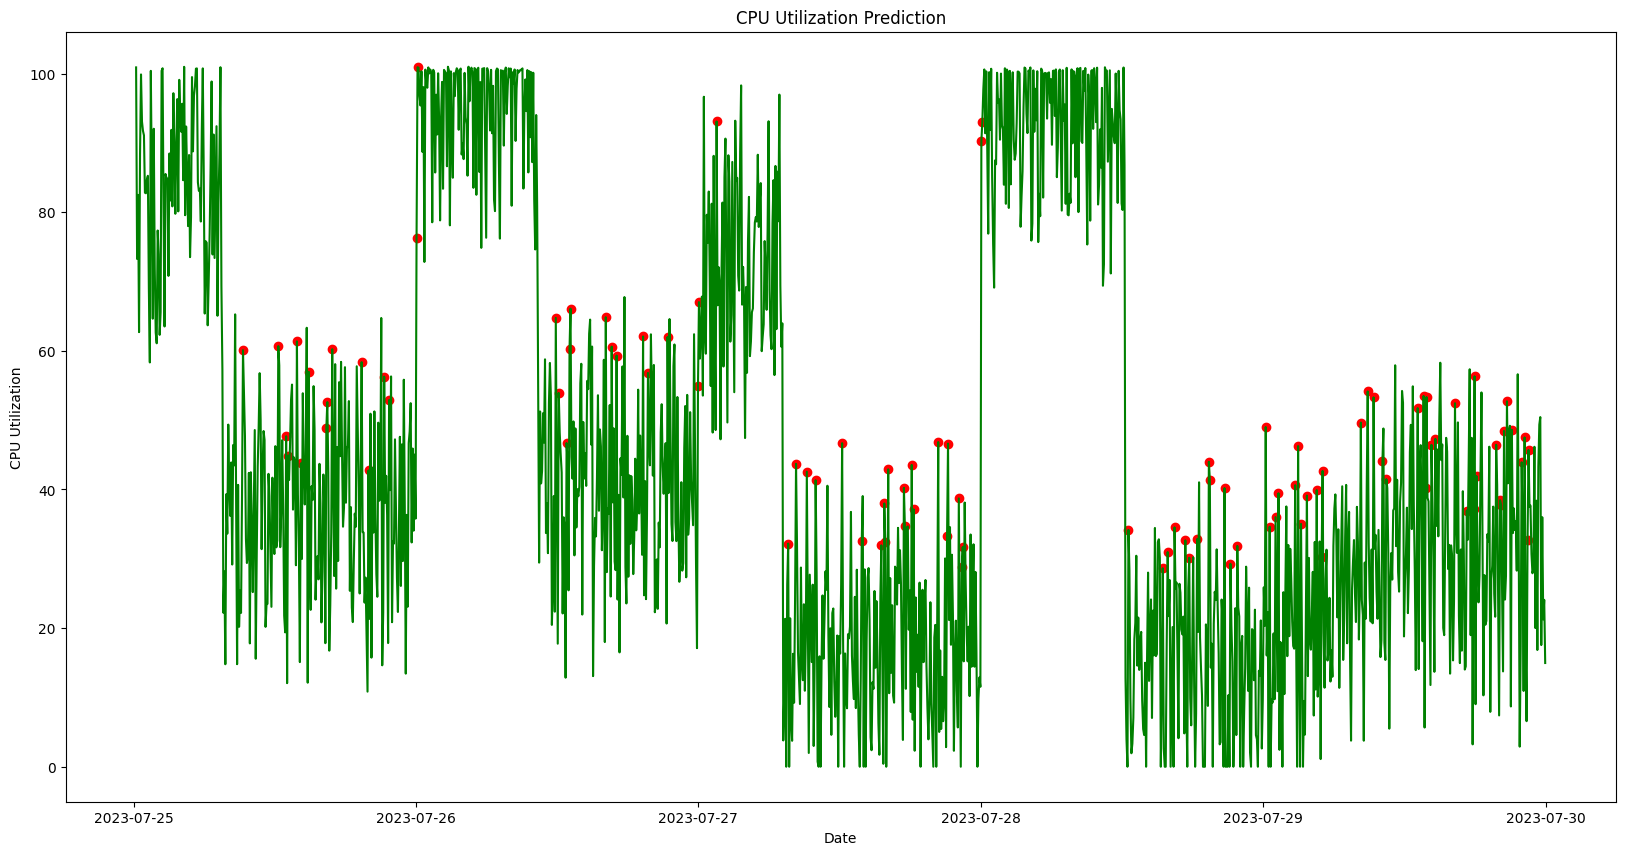

In [29]:
#scatter plot the prediction 1
anomaly = df.iloc[np.where(df['predict'] == 1)]

plt.figure(figsize=(20,10))
plt.plot(df['date'], df['cpu_util'], color='green')
plt.scatter(anomaly['date'], anomaly['cpu_util'], color='red')
plt.xlabel('Date')
plt.ylabel('CPU Utilization')
plt.title('CPU Utilization Prediction')
plt.show()

